# 1: Introduction/Business Problem

Coffee is one of the most popular drink all over the world. From morning routines to sweet conversations with our friends, it is almost essential to our daily life. The United States imports in excess of 4 Billion worth of coffee per year. Americans consume 400 million cups of coffee per day making tje United States the leading consumer of soffee in the world. Independent coffee shops equal $12 billion in annual sales. At the present time there are approximately 24,000 Coffee Shops across the country. This statistics shows how vital coffee is for our daily routines and how perfect business opportunity. When talking about coffee it is ineviateble to mention one company - Starbucks. Starbucks has almost 30000 stores all over the world. Opening another store is very risky and its location must be chosen wisely. In this analysis, I will find best spots in Chicago, IL to open and operate new coffee shop. This analysis is for two types of business people : 
        
        1. Starbuck stakeholders - To find best spots for maximum profitability
        2. Coffee businesspeople - To find best spots to escape competition with Starbucks and increase profit.
    



# 2:  Data
  
  
For this problem I need 2 types of data : 
        1. Chicago Census Data.
        2. Location data of Starbucks.

First of them is Chicago Census Data, which provided in this course before and I have this data locally. This data will be used to find and classify best neighborhoods of Chicago according to many factors such as Per Capita Income. Then I will choose these best community areas and will use second data to analyse further.

Secondly, to get location of Starbucks Coffee shops I will leverage Foursquare. I will use premiım calls to get Coffee shops around each neighborhood chosen in previos step, and will further analyse each place.

Finally, with these datas I will determine which place is best to open a new Starbucks coffee Shop.

# 3: Methodology and Analysis

 
To achieve what I want, some essential libraries will be imported. Also I will create my Foursquare agent.


In [54]:
# Necessary Libraries to import
 
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from sklearn.impute import SimpleImputer # To fill NaN values
from sklearn.cluster import KMeans  # For Clusterin algorithm
from sklearn.preprocessing import StandardScaler # To normalize dataframe

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
    
from pandas.io.json import json_normalize # For normalazing json

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [1]:
# Foursquare details

CLIENT_ID = 'CIWSMG3EFE22USECQ4QFCFMIO5LRCDSO4VV3NKL1WRSUSJKM' # my Foursquare ID
CLIENT_SECRET = 'BEJXVNTQFWFKDWJFZEYS544RRTZU0VUMF1XPYW3K4F4N5V0D' # my Foursquare Secret
VERSION = '20181204'
LIMIT = 40 # How mant places at max in one call
radius = 1000  # Maximum radius from given coordinate
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CIWSMG3EFE22USECQ4QFCFMIO5LRCDSO4VV3NKL1WRSUSJKM
CLIENT_SECRET:BEJXVNTQFWFKDWJFZEYS544RRTZU0VUMF1XPYW3K4F4N5V0D


## 3.1 Classification of Neighborhoods

  Firstly , I will import Chicago Census Data and use it to cluster Chicago neighborhoods

In [6]:

census_data = pd.read_csv("Chicago_Census_Data.csv")

# It is redundant information and I will drop that
census_data.drop("COMMUNITY_AREA_NUMBER",axis = 1,inplace = True)

census_data.head()

,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In order to classify our neighborhoods, we only need numeric data. So let's create a new dataframe with only numeric datas of census_data. 
Then I will check if there is any nan value. If so, with using Simple Imputer I will fill them

In [7]:
X = census_data.drop("COMMUNITY_AREA_NAME",axis = 1)
X.isnull().any()

PERCENT OF HOUSING CROWDED                      False
PERCENT HOUSEHOLDS BELOW POVERTY                False
PERCENT AGED 16+ UNEMPLOYED                     False
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    False
PERCENT AGED UNDER 18 OR OVER 64                False
PER_CAPITA_INCOME                               False
HARDSHIP_INDEX                                   True
dtype: bool

In [8]:
# Defining Imputer instance
myimputer = SimpleImputer(strategy = "mean")

# Filling missing vales and creating same dataframe with same column names
X = pd.DataFrame(myimputer.fit_transform(X),columns = X.columns)

X.isnull().any()

PERCENT OF HOUSING CROWDED                      False
PERCENT HOUSEHOLDS BELOW POVERTY                False
PERCENT AGED 16+ UNEMPLOYED                     False
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    False
PERCENT AGED UNDER 18 OR OVER 64                False
PER_CAPITA_INCOME                               False
HARDSHIP_INDEX                                  False
dtype: bool

Now, since I will use K means clustering algorith to cluster neighborhoods, it is absolutely essential to normalize our data. I will use Standart Scaler to do this

In [9]:
# Normalazing our data and retaining same columns names in same dataframe
X = pd.DataFrame(StandardScaler().fit_transform(X),columns = X.columns)

X.head()

,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,0.764551,0.163416,-0.891261,-0.182570,-1.135456,-0.109811,-0.370988
1,0.792058,-0.398799,-0.877841,0.040205,0.384390,-0.169353,-0.123815
2,-0.308218,0.198555,-0.864420,-0.730939,-1.867745,0.674894,-1.041883
3,-0.418246,-0.952229,-0.958364,-0.593847,-1.411792,0.789937,-1.147814
4,-1.270960,-1.250905,-1.360980,-1.356422,-1.315074,2.087997,-1.536228


Now lets cluster our neighborhoods with KMeans algorithm

In [41]:
# defining my model with 8 clusters
mymodel = KMeans(n_clusters = 8)

# Fitting my model to X
mymodel.fit(X)

# Creating label dataframe with labels of our model
labels = pd.DataFrame(mymodel.labels_,columns = ["label"])

labels.head()

,label
0,2
1,2
2,5
3,5
4,3


Now, since we found label of each neighborhoods, lets add these label dataframe to our original dataframe. Then we will find best cluster in our dataframe and will continue with these neighborhoods 

In [42]:
# Creating new column with label values
census_data["LABEL"] = labels.values

# Grouping data by labels
census_data.groupby("LABEL").mean()

,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
LABEL,,,,,,,
0,1.763636,8.854545,11.172727,10.581818,38.500000,33006.000000,22.545455
1,3.331250,26.731250,21.425000,17.268750,39.387500,18501.875000,60.187500
2,5.466667,15.500000,10.908333,19.841667,34.866667,24210.833333,39.181818
3,1.150000,12.100000,5.433333,3.950000,20.433333,67000.666667,4.000000
4,14.420000,28.120000,17.640000,45.660000,37.760000,12441.600000,89.800000
5,3.212500,17.375000,8.412500,10.925000,24.762500,36421.875000,17.750000
6,5.520000,43.780000,27.300000,26.060000,43.060000,12695.200000,88.800000
7,8.560000,19.460000,13.890000,35.500000,37.380000,16440.100000,66.700000


We observe that 3rd cluster is by far best cluster in terms of Per Capita Income, Hardship Index and so on. So I will consider only these neighborhoods in 3rd cluster to analyze further

_Best Cluster = 3rd Cluster_

Now lets check how many neighborhoods are there in each cluster.

In [43]:
# Grouping by count
census_data.groupby("LABEL").count()

,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
LABEL,,,,,,,,
0,11,11,11,11,11,11,11,11
1,16,16,16,16,16,16,16,16
2,12,12,12,12,12,12,12,11
3,6,6,6,6,6,6,6,6
4,5,5,5,5,5,5,5,5
5,8,8,8,8,8,8,8,8
6,10,10,10,10,10,10,10,10
7,10,10,10,10,10,10,10,10


In [45]:
# Now lets choose 3rd cluster, create a new dataframe and sorth values in descending order by Income
final_data = census_data[census_data.LABEL == 3].sort_values(by = "PER_CAPITA_INCOME ",ascending = False)


In order to get location of each neighborhoods without any error, I will add Chicago to each neighborhood. This is because ther can be more than 1 place with same neighborhood name

In [46]:
final_data["COMMUNITY_AREA_NAME"] = final_data["COMMUNITY_AREA_NAME"] + ", Chicago"


final_data.reset_index(drop = True, inplace = True)

final_data

,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX,LABEL
0,"Near North Side, Chicago",1.9,12.9,7.0,2.5,22.6,88669,1.0,3
1,"Lincoln Park, Chicago",0.8,12.3,5.1,3.6,21.5,71551,2.0,3
2,"Loop, Chicago",1.5,14.7,5.7,3.1,13.5,65526,3.0,3
3,"Lake View, Chicago",1.1,11.4,4.7,2.6,17.0,60058,5.0,3
4,"Near South Side, Chicago",1.3,13.8,4.9,7.4,21.8,59077,7.0,3
5,"North Center, Chicago",0.3,7.5,5.2,4.5,26.2,57123,6.0,3


In order to Narrow down our Analysis, I will choose 4 best neighborhoods to analyze further.

In [47]:
# Choosing four best neighborhoods
final_data  = final_data.head(4)

final_data

,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX,LABEL
0,"Near North Side, Chicago",1.9,12.9,7.0,2.5,22.6,88669,1.0,3
1,"Lincoln Park, Chicago",0.8,12.3,5.1,3.6,21.5,71551,2.0,3
2,"Loop, Chicago",1.5,14.7,5.7,3.1,13.5,65526,3.0,3
3,"Lake View, Chicago",1.1,11.4,4.7,2.6,17.0,60058,5.0,3


Since we found 4 best neighborhoods to analyze, It is time to use Foursquare to analyze further and vizualie them

## 3.2 Using Foursquare 

Now, I will use Foursquare to get location of each neighborhoods that I will use. Then I will visualize them on map. Our user agent name will be capstone_agent

In [49]:
# Defining lists to store latitude and longitude values
lat_list = []
lng_list = []

for address in final_data["COMMUNITY_AREA_NAME"]:

    geolocator = Nominatim(user_agent="capstone_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    lat_list.append(latitude)
    lng_list.append(longitude)
    

print(lat_list)
print(lng_list)


[41.9000327, 41.94029765, 41.8755616, 41.94705]
[-87.6344975, -87.6381171054176, -87.6244212, -87.6554287829005]


Now, Lets extract latitude ang longitude of each neighborhoods. I will use abbrevations to represent neighborhood names

In [50]:
# Near North Side
lat_NNS = lat_list[0]
long_NNS = lng_list[0]

# Lincoln Park
lat_LP = lat_list[1]
long_LP = lng_list[1]

# Loop
lat_L = lat_list[2]
long_L = lng_list[2]

# Lake View
lat_LW = lat_list[3]
long_LW = lng_list[3]

Lets visualize each neighborhood on the map.

In [52]:
venues_map = folium.Map(location=[latitude,longitude], zoom_start=10) 

folium.CircleMarker(
        [lat_NNS,long_NNS],
        radius=10,
        color='red',
        popup="Near North Side",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)

folium.CircleMarker(
        [lat_LP,long_LP],
        radius=10,
        color='red',
        popup="Lincoln Park",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)

folium.CircleMarker(
        [lat_L,long_L],
        radius=10,
        color='red',
        popup="Loop",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)


folium.CircleMarker(
        [lat_LW,long_LW],
        radius=10,
        color='red',
        popup="Lake View",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)

venues_map

 Now let's search for Starbucks in each neighborhoods. For this I will create an url for each neighborhood and then use request library to get json formatted data

In [33]:
search_query = 'Starbucks'



# Defining URLs for each neighborhood
url_NNS = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, lat_NNS, long_NNS, VERSION, search_query, LIMIT,radius)

url_LP = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, lat_LP, long_LP, VERSION, search_query, LIMIT,radius)

url_L = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, lat_L, long_L, VERSION, search_query, LIMIT,radius)

url_LW = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, lat_LW, long_LW, VERSION, search_query, LIMIT,radius)


# Requesting data for each neighborhood
result_NNS = requests.get(url_NNS).json()
result_LP = requests.get(url_LP).json()
result_L = requests.get(url_L).json()
result_LW = requests.get(url_LW).json()


Lets examine on eof them to see what is in

In [35]:
result_LW

{'meta': {'code': 200, 'requestId': '5d1dca18bf7dde002c314303'},
 'response': {'venues': [{'id': '58fef9fb6fd626300700921c',
    'name': 'Starbucks Reserve',
    'location': {'address': '3649 N Clark Street',
     'lat': 41.94829540140019,
     'lng': -87.65720664380231,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.94829540140019,
       'lng': -87.65720664380231}],
     'distance': 202,
     'postalCode': '60613',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['3649 N Clark Street',
      'Chicago, IL 60613',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1562233368',
    'hasPerk': False},
   {'id': '4a15b903f964a

We see that what we want is stored in __response__ - __venues__. So I will get data from these tags because they are all we need to analyze. 
Since For each neighborhood I got json data, I will create new dataframe with desired information

In [36]:
# Creating venues data frame for each neighborhood with json normalize 

venue_NNS = json_normalize(result_NNS["response"]["venues"])
venue_LP = json_normalize(result_LP["response"]["venues"])
venue_L = json_normalize(result_L["response"]["venues"])
venue_LW = json_normalize(result_LW["response"]["venues"])


# Observing one of them to see what is in there
venue_LW.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,58fef9fb6fd626300700921c,3649 N Clark Street,US,Chicago,United States,NaN,202,"[3649 N Clark Street, Chicago, IL 60613, Unite...","[{'label': 'display', 'lat': 41.94829540140019...",41.948295,-87.657207,60613,IL,Starbucks Reserve,v-1562233368
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4a15b903f964a520c0781fe3,3184 N Clark St,US,Chicago,United States,NaN,892,"[3184 N Clark St, Chicago, IL 60657, United St...","[{'label': 'display', 'lat': 41.93980704, 'lng...",41.939807,-87.650814,60657,IL,Starbucks,v-1562233368
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4ab54ef4f964a520e07320e3,3400 N. Southport Ave.,US,Chicago,United States,at W Roscoe St,819,"[3400 N. Southport Ave. (at W Roscoe St), Chic...","[{'label': 'display', 'lat': 41.94358187, 'lng...",41.943582,-87.664156,60657,IL,Starbucks,v-1562233368
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b40f526f964a5203dbe25e3,3358 N Broadway St,US,Chicago,United States,NaN,933,"[3358 N Broadway St, Chicago, IL 60657, United...","[{'label': 'display', 'lat': 41.94362584, 'lng...",41.943626,-87.645139,60657,IL,Starbucks,v-1562233368
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4a8da3b1f964a5205a1020e3,3549 N. Sheffield Ave.,US,Chicago,United States,NaN,110,"[3549 N. Sheffield Ave., Chicago, IL 60657, Un...","[{'label': 'display', 'lat': 41.94688709004546...",41.946887,-87.654117,60657,IL,Starbucks,v-1562233368


We see that majority of columns are useless for my analysis and I will get rid of them 

In [38]:
# Defining a list with columns to drop
to_drop = ["categories","hasPerk","location.address","location.cc","location.city",
           "location.country","location.distance","location.crossStreet","location.formattedAddress",
           "location.labeledLatLngs","location.postalCode",
           "location.state","referralId"]


#Dropping columns from each dataframe
venue_NNS.drop(columns = to_drop, inplace = True)
venue_LP.drop(columns = to_drop, inplace = True)
venue_L.drop(columns = to_drop, inplace = True)
venue_LW.drop(columns = to_drop, inplace = True)

# Observing one of them
venue_LW.head()

,id,location.lat,location.lng,name
0,58fef9fb6fd626300700921c,41.948295,-87.657207,Starbucks Reserve
1,4a15b903f964a520c0781fe3,41.939807,-87.650814,Starbucks
2,4ab54ef4f964a520e07320e3,41.943582,-87.664156,Starbucks
3,4b40f526f964a5203dbe25e3,41.943626,-87.645139,Starbucks
4,4a8da3b1f964a5205a1020e3,41.946887,-87.654117,Starbucks


Lets create new lists to get lattitude and longitude for each neighborhoods in our dataframes. This will make easier to visualize each coffe shop in each neighborhood on the map

In [39]:
#For latitude I use_lat list and for longitude I use lng_list
NNS_lat_list = list(venue_NNS["location.lat"].values)
NNS_lng_list = list(venue_NNS["location.lng"].values)

LP_lat_list = list(venue_LP["location.lat"].values)
LP_lng_list = list(venue_LP["location.lng"].values)

L_lat_list = list(venue_L["location.lat"].values)
L_lng_list = list(venue_L["location.lng"].values)

LW_lat_list = list(venue_LW["location.lat"].values)
LW_lng_list = list(venue_LW["location.lng"].values)

Visualize each spot on the map with neihborhood centers

In [53]:
venues_map = folium.Map(location=[latitude,longitude], zoom_start=10) 

folium.CircleMarker(
        [lat_NNS,long_NNS],
        radius=10,
        color='red',
        popup="Near North Side",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)

folium.CircleMarker(
        [lat_LP,long_LP],
        radius=10,
        color='red',
        popup="Lincoln Park",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)

folium.CircleMarker(
        [lat_L,long_L],
        radius=10,
        color='red',
        popup="Loop",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)


folium.CircleMarker(
        [lat_LW,long_LW],
        radius=10,
        color='red',
        popup="Lake View",
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
).add_to(venues_map)





for lat,lng,name in zip(NNS_lat_list, NNS_lng_list,venue_NNS["name"]):
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        color='green',
        popup=name,
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.6
).add_to(venues_map)
    
for lat,lng,name in zip(LP_lat_list, LP_lng_list,venue_LP["name"]):
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        color='green',
        popup=name,
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.6
).add_to(venues_map)
    
    
for lat,lng,name in zip(L_lat_list, L_lng_list,venue_L["name"]):
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        color='green',
        popup=name,
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.6
).add_to(venues_map)
    

for lat,lng,name in zip(LW_lat_list, LW_lng_list,venue_LW["name"]):
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        color='green',
        popup=name,
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.6
).add_to(venues_map)


venues_map

At First it is observed that Both of Near North Side and Loop community areas are very crowded where as Lake View and Lincoln Park are good places to open a new Starbucks shop:
1. Crowded : __Near North Side and Loop__
2. Not Crowded : __Lake View and Lincoln Park__

But I am going to analyze further and use statistics to improve my analysis

## 3.3 Statistical Inferences

In this part I am going to get ratings of each Starbucks shop and analye these ratings to determine which neighborhoods are in desperate need of new and better serving Shop. To do this I will use premium Foursquare calls:

1. Create a list to store ratings
2. Get venue ids from neighborhoods dataframes
3. Use these ids to get information about specific places and store their ratings
4. Analyze ratings 

Note : For any place without rating, I will pass them. Ratings are stored in response-venue-rating

In [55]:
# Near North Side rating list
rating_NNS = []

# Looping over venue ids, creating corresponding URL and getting details

for i in range(len(venue_NNS)):
    venue_id = venue_NNS["id"][i]
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

    rating = requests.get(url).json()
    
    try:
        rating_NNS.append(rating["response"]["venue"]["rating"])
    except:
        pass

rating_NNS = pd.DataFrame(rating_NNS, columns = ["scores"])

In [56]:
# Lincoln Park rating list
rating_LP = []

# Looping over venue ids, creating corresponding URL and getting details

for i in range(len(venue_LP)):
    venue_id = venue_LP["id"][i]
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

    rating = requests.get(url).json()
    
    try:
        rating_LP.append(rating["response"]["venue"]["rating"])
    except:
        pass
     

rating_LP = pd.DataFrame(rating_LP, columns = ["scores"])

In [57]:
# Loop rating list
rating_L = []

# Looping over venue ids, creating corresponding URL and getting details

for i in range(len(venue_L)):
    venue_id = venue_L["id"][i]
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

    rating = requests.get(url).json()
    
    try:
        rating_L.append(rating["response"]["venue"]["rating"])
    except:
        pass

rating_L = pd.DataFrame(rating_L, columns = ["scores"])

In [58]:
# Lake View rating list
rating_LW = []

# Looping over venue ids, creating corresponding URL and getting details

for i in range(len(venue_LW)):
    venue_id = venue_LW["id"][i]
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

    rating = requests.get(url).json()
    
    try:
        rating_LW.append(rating["response"]["venue"]["rating"])
    except:
        pass

rating_LW = pd.DataFrame(rating_LW, columns = ["scores"])

Lets check each dataframe with ratings with describe method and gain some insights. To ease comparison I will create a new dataframe containing all of the datas from individual neighborhoods dataframe describe method. But First lets see what describe method gives us

In [82]:
rating_NNS.describe()

,scores
count,28.000000
mean,7.457143
std,0.792291
min,5.100000
25%,7.175000
50%,7.500000
75%,8.100000
max,8.800000


Now, I will use this method and get values. Then I will concatanate them for ease comparision

In [83]:
# Index values - Since all indexes are the same I will get only one of them and use the same for all
index = rating_NNS.describe().index


# defining new dataframes containing describe method datas

describe_NNS = pd.DataFrame(rating_NNS.describe().values, columns = ["Near North Side"])
describe_NNS.index = index

describe_LP = pd.DataFrame(rating_LP.describe().values, columns = ["Lincoln Park"])
describe_LP.index = index

describe_L = pd.DataFrame(rating_L.describe().values, columns = ["Loop"])
describe_L.index = index

describe_LW = pd.DataFrame(rating_LW.describe().values, columns = ["Lake View"])
describe_LW.index = index


# Checking one of them for insights
describe_NNS

,Near North Side
count,28.000000
mean,7.457143
std,0.792291
min,5.100000
25%,7.175000
50%,7.500000
75%,8.100000
max,8.800000


Lets concatanate them to one dataframe

In [98]:
# Dataframes to join in list
to_join = [describe_NNS, describe_LP, describe_L, describe_LW]

# Joining all of them
compare = to_join[0].join(to_join[1:])

# Getting transpose to observe better
compare = compare.transpose()

compare

,count,mean,std,min,25%,50%,75%,max
Near North Side,28.0,7.457143,0.792291,5.1,7.175,7.5,8.1,8.8
Lincoln Park,3.0,7.900000,0.754983,7.1,7.550,8.0,8.3,8.6
Loop,33.0,7.163636,0.630386,5.6,6.600,7.3,7.7,8.1
Lake View,5.0,7.540000,0.716240,7.1,7.100,7.3,7.4,8.8


In here we observe again that, Near North is very crowded and ratings are high. On the other hand Lincoln park is less crowded and ratings are very high. Lets vizualie further.

Lets Use Seaborn library to visualize ratings for each neighborhood

/home/musto/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


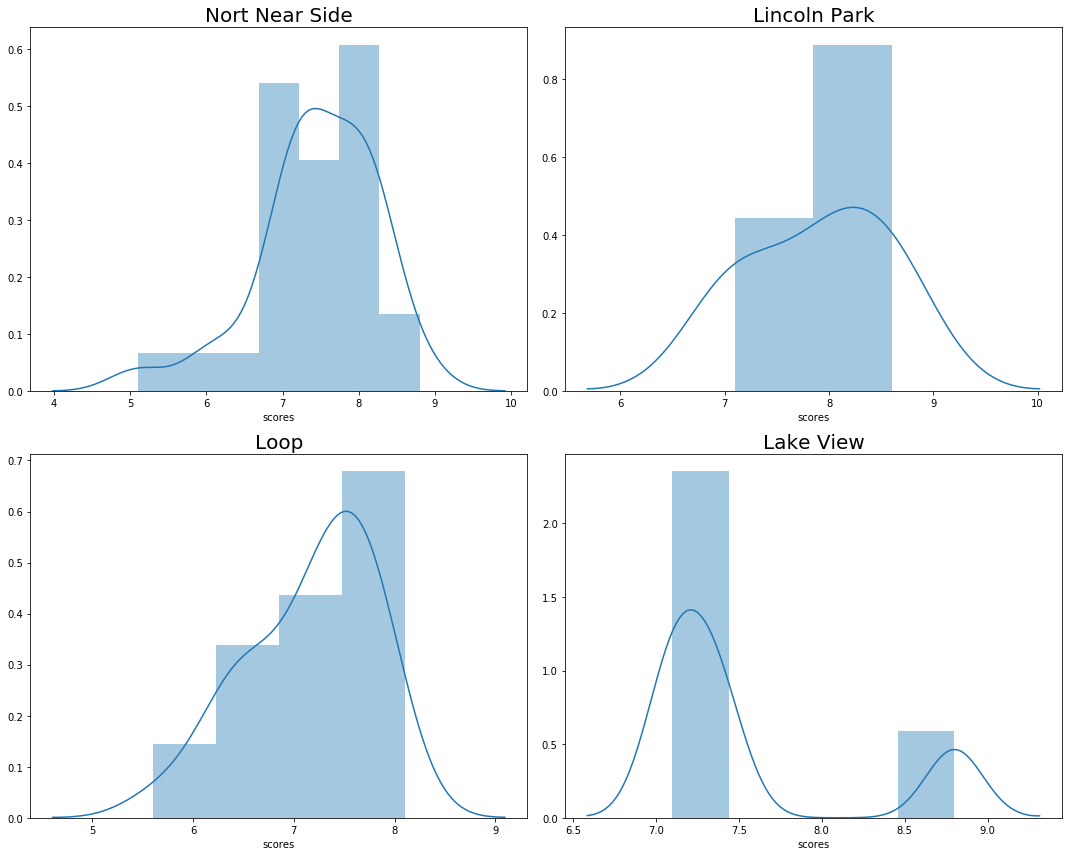

In [101]:
# Creating figure with 4 subplots
fig, ax =plt.subplots(2,2, figsize = (15,12))


# plotting
sns.distplot(rating_NNS.scores,kde = True, ax=ax[0][0])
sns.distplot(rating_LP.scores,kde = True, ax=ax[0][1])
sns.distplot(rating_L.scores,kde = True, ax=ax[1][0])
sns.distplot(rating_LW.scores,kde = True, ax=ax[1][1])


# Setting titles
ax[0][0].set_title("Nort Near Side",fontsize = 20)
ax[0][1].set_title("Lincoln Park",fontsize = 20)
ax[1][0].set_title("Loop",fontsize = 20)
ax[1][1].set_title("Lake View",fontsize = 20)



fig.tight_layout()
fig.show()

Now lets use boxplots to compare each of them and vizualize at the same graph. For that, I will create a dictionary, Store values in appropriate keys and visualize them

In [105]:
# Creating dictionary with rating values
compare_dict = {"Near North Side": rating_NNS.scores,
                "Lincoln Park":rating_LP.scores,
                "Loop":rating_L.scores,
                "Lake Wiew":rating_LW.scores}

/home/musto/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


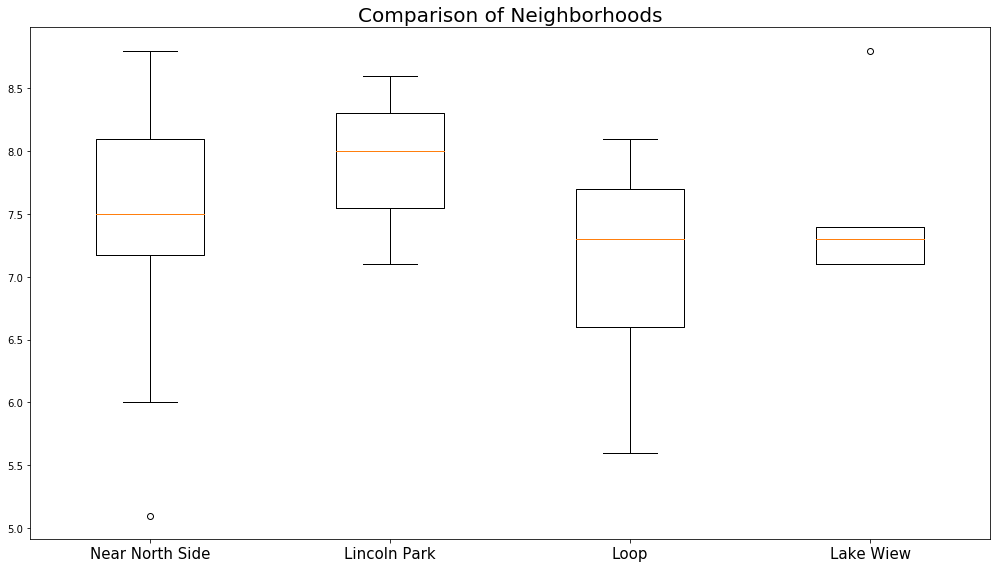

In [109]:
# Creating Box plot to observe all of them and compare

fig, ax = plt.subplots(figsize = (14,8))

ax.boxplot(compare_dict.values())

ax.set_title("Comparison of Neighborhoods",fontsize = 20)


ax.set_xticklabels(compare_dict.keys(),fontsize  = 15)


fig.tight_layout()
fig.show()

 This is the end of Analysis Section. In the next section I will analyze my findings and will come to final decision

# 4 : Results and Discussion

In this section I will use my findings to come to conclusion. Also I will present my thougths about my flaws and what can deteriote my analysis

## 4.1 : Results

After Analysing and vizualizing my data , my conclusion is that __Lake View__ is the best neighborhood to open a new Starbucks shop. My reasons are that : 
1. It is not crowded 
2. Rating scores are not very high.

__Loop__ on the other side is fairly crowded. When looking to average score it is very low but observing its distribution,median and quartile scores it is not as good as __Lake View__. there is some kind of need to new better serving shop. 

Thirdly , __Lincoln Park__ has only 3 shops. It is definetely now crowded but average rating is 7.9 which is very high. With small amount of sampled it is hard to find a reason to open a new restaurant there. 

Finally, I think __Near North Side__ is worst place to operate. It is very crowded, has decent average score, median and quartiles are high. Also it is normally distributed. I think one must stay away from __Near North Side__

## 4.2 : Discussion

In my analysis , I used census data and Foursquare data to find crowded neighborhoods with Starbucks. But one thing I missed is that crowded is not necesseraly bad. There can be way more people living in one area and thus, Reducing per capita starbucks in final. For instance : 

1. X neighbırhood has 50 starbucks and 1 million population.
2. Y meighborhood has 5 starbucks and 20 k population.

At First it seems that X is overcrowded. But When we observe that per capita starbucks is equal to (to how many people one starbucks shop serve) 20k in X and only 4k in Y, it is reosanable to think X is not overcrowded. 

But we did not have population data in our census data and I omittied this part. 

Moreover, in general 2 of our neighborhoods has fewer than 6 starbucks and that is very little data to analyse properly. But again since that is all we have, I have done my analysis with that.

# 5 : Conclusion

Purpose of this project was to identify best spot in Chicaho neighborhoods to open a new Starbucks shop. Firstly I used KMeans clusterin algorith to cluster neighborhodds in order to find best of them. Then I leveraged Foursquare to get shop detail and their ratings to analyze. Finally Using data vizualisation methods and Statistical inferences to find optimal spots to open a new Starbuck shop.

Also, I discussed possible flaws in my analysis such as data scarcity and missing of population data. 

Final decission on optimal shop location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like shop ratings, neighborhood attractivenessi possible impact of missing data and etc.

### This Notebook is created by Mustafa Abdullayev